# Project: Wrangling and Analyze Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import requests
import os
import json
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# reading twitter_archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# downloading image-predictions.tsv from a website using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions =  pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#assuming we got twitter api json response and stored it into the text file tweet-json.txt
# reading the text file as json
tweet_file = open('tweet-json.txt', "r")

data = []
for line in tweet_file:
    try:
        tweet = json.loads(line)
        data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [6]:
tweet_info_list = []

for entry in data:
    tweet_info_list.append({
        'tweet_id': entry['id'],
        'retweets': entry['retweet_count'],
        'favorites': entry['favorite_count'],
        
    })

tweet_info = pd.DataFrame(tweet_info_list, columns=['tweet_id', 'retweets', 'favorites'])

We have gathered the following data:
<ul>
  <li>twitter_archive: contains basic informations about tweets </li>
  <li>image_predictions: contains predictions about the images in tweets </li>
  <li>tweet_info: contains informations about tweets's likes, retweets, ... </li>
</ul>

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### Visual assessment


In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [10]:
tweet_info.head()

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [11]:
tweet_info.tail()

,tweet_id,retweets,favorites
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [12]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Programmatic Assessment

In [15]:
#There are some columns with null values
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# the rating denominator shouldn't receive the strange value such as 170
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [18]:
#No duplicated tweet
twitter_archive.tweet_id.duplicated().sum()

0

In [19]:
# the "a" here is a weird name
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [20]:
# Look at the text, the algorithm might be mistaken when extracting the name from it and get the result of 'a'
twitter_archive[twitter_archive['name'] == 'a'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None


In [21]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   retweets   2354 non-null   int64
 2   favorites  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [22]:
tweet_info.describe()

,tweet_id,retweets,favorites
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [23]:
tweet_info.isnull().sum()

tweet_id     0
retweets     0
favorites    0
dtype: int64

In [24]:
tweet_info.tweet_id.duplicated().sum()

0

In [25]:
twitter_archive.shape[0] - tweet_info.shape[0]

2

In [26]:
#There is no null values
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
#There is no duplicated tweet
image_predictions.tweet_id.duplicated().sum()

0

In [29]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [30]:
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

### Quality issues
#### Twitter Archive 
1. The value "a" in the dog name was likely a misunderstanding of the context. For example "this is a dog" and the algorithm mistaken it with the dog's name. So the value for those rows should be None instead

2. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are float, should all be int

3. timestamp is object datatype which represent a string with the weird +0000 in the end, should be datetime instead

4. While rating numerator can exceed 10 as a way of saying or meme, rating denometor should only receive the value of 10, also both columns receive some strange values. 

5. Some rows that have the value of retweeted_status_id, retweeted_status_user_id is not null, which means these are retweets and the values in the columns other than tweet_id will be duplicated.

6. The 'source' column still have the html tag inside it

#### Twitter Json

7. The dataset only have 2354 rows less than the tweet_archive 2 rows, which means there were 2 rows missing

#### Image Prediction
8. p1, p2 ,p3 arent consistent when it comes to the dog breed,some of them are not dogs

### Tidiness issues
1. The last 4 column of twitter_archive can be merge into 1 column variables to give the same information

2. The 3 dataset can be merge as they all use tweet_id as the primary key

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

### Issue #1:

#### Define:
Merge the dog stages columns ('doggo', 'floofer', 'pupper', 'puppo') into one column

#### Code
>Count the number of values before merging

In [32]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [33]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [34]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [35]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [36]:
#Checking if is there any rows that have the value beside none for more than 1 columns out of 4
pd.set_option('display.max_colwidth', None)
twitter_archive[(twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']]=='None').sum(axis=1)==2].head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None


>Looking at the text, there are case when the tweet mentions more than 1 dogs. Since such dataset cant not be fit in any regression model and require dog_stage as separete dummy variable, we should still merge them into 1 column and separate them by ",". This way, we can still count them if neceassy 

In [37]:
# Merging 4 columns into 1, dont merge the value if its is None
dog_stage=twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']]
twitter_archive_clean['dog_stage'] = dog_stage.apply(lambda row: ', '.join([value for value in row.values if value != 'None']), axis=1)
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)
# Replace blank spaces with None
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('', 'None')
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None


#### Test

In [38]:
twitter_archive_clean['dog_stage'].value_counts()

None              1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

> This should add up exactly as before we megre, for ie: the total doggo = 83+12+1+1= 97

### Issue #2:

#### Define
find out the reasons for the invalid 'rating_numerator' and 'rating_denominator' strange and fix them

#### Code

In [39]:
twitter_archive_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [40]:
twitter_archive_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

> for rating numerator, values such as 11, 12 or 14 are quite reasonable , however for strange value like 75, 420, they are likely to be bias. The same goes for denominator, 10 and 100 can be reasonable and others are likely to be bias.

> It seems like most bias values only appear less then 4 times, so we will eliminate them

In [41]:
numerators_to_delete = twitter_archive_clean.rating_numerator.value_counts().loc[lambda x : x <= 3]
for numerator in numerators_to_delete.index:
    twitter_archive_clean.drop(twitter_archive_clean.query('rating_numerator == ' + str(numerator)).index, inplace=True)
    
denominator_to_delete = twitter_archive_clean.rating_denominator.value_counts().loc[lambda x : x <= 3]
for denominator in denominator_to_delete.index:
    twitter_archive_clean.drop(twitter_archive_clean.query('rating_denominator == ' + str(denominator)).index, inplace=True)

#### Test

In [42]:
twitter_archive_clean.rating_numerator.value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
14     54
7      54
5      37
6      32
3      19
4      15
2       9
1       8
Name: rating_numerator, dtype: int64

In [43]:
twitter_archive_clean.rating_denominator.value_counts()

10    2319
Name: rating_denominator, dtype: int64

### Issue #3

#### Define
Drop retweet records
#### Code

In [44]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull()]
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [45]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #4:

#### Define
Fix the incorrect datatype for some columns and drop unnecessary ones. 

#### Code

In [46]:
twitter_archive_clean = twitter_archive_clean

In [47]:
# Drop column that relate to reweet, reply and the datatypes of them wont be matter anymoe
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'],axis=1)

In [48]:
# fix timestamp data type
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

#### Test

In [49]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2074 non-null   int64 
 1   timestamp           2074 non-null   object
 2   source              2074 non-null   object
 3   text                2074 non-null   object
 4   expanded_urls       2071 non-null   object
 5   rating_numerator    2074 non-null   int64 
 6   rating_denominator  2074 non-null   int64 
 7   name                2074 non-null   object
 8   dog_stage           2074 non-null   object
dtypes: int64(3), object(6)
memory usage: 162.0+ KB


In [50]:
twitter_archive_clean.timestamp.head()

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
3    2017-07-30 15:58:51
4    2017-07-29 16:00:24
Name: timestamp, dtype: object

### Issue #5:

#### Define
Merge tweet_info and image_predictions with twitter_archive

#### Code

In [51]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, how='inner', on='tweet_id')
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_info_clean, how='inner', on='tweet_id')

#### Test

In [52]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweets', 'favorites'],
      dtype='object')

In [53]:
twitter_archive_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


### Issue #6:

#### Define

Replace dog named 'a' with None

#### Code

In [54]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('a', 'None')

#### Test

In [55]:
twitter_archive_clean[twitter_archive_clean['name']=='a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites


### Issue #7:

#### Define
remove 2 tweet_id information are missing (because tweet_info is 2 rows less then the others)

#### Code

In [56]:
twitter_archive_clean[twitter_archive_clean['favorites'].isnull()].tweet_id

Series([], Name: tweet_id, dtype: int64)

In [57]:
# because there are only 2 rows, we will just drop them
twitter_archive_clean.dropna(subset=['favorites'], inplace=True)

#### Test

In [58]:
twitter_archive_clean[twitter_archive_clean['favorites'].isnull()].tweet_id

Series([], Name: tweet_id, dtype: int64)

### Issue #8:

#### Define
Eliminate html tag in source column

#### Code

In [59]:
twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1910
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [60]:
twitter_archive_clean.loc[twitter_archive_clean['source'].str.contains('Twitter for iPhone'), 'source'] = 'Twitter for iPhone'
twitter_archive_clean.loc[twitter_archive_clean['source'].str.contains('Vine - Make a Scene'), 'source'] = 'Vine - Make a Scene'
twitter_archive_clean.loc[twitter_archive_clean['source'].str.contains('Twitter Web Client'), 'source'] = 'Twitter Web Client'
twitter_archive_clean.loc[twitter_archive_clean['source'].str.contains('TweetDeck'), 'source'] = 'TweetDeck'

#### Test

In [61]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone    1910
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### Issue #9:

#### Define
Eliminate rows that are not predicted as dog

#### Code

In [62]:
# Filter posts that are not dogs and put those tweet_id into a drop_list
twitter_archive_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id
drop_list = twitter_archive_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

# Drop the rows with tweet_id in the drop_list in all dataframes
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(drop_list)]

#### Test

In [63]:
twitter_archive_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

Series([], Name: tweet_id, dtype: int64)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
# Store the clean dataframe in a CSV file named twitter_archive_master.csv
twitter_archive_clean.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [65]:
df = twitter_archive_clean.copy()
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562


#### Most popular dog breed

In [66]:
# Since p1 is the predictions with the highest confident, we will base on that to determine the dog breed
# the top 10 most mentioned dog
df.p1.value_counts().head(10)

golden_retriever      134
Labrador_retriever     91
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
toy_poodle             37
Pomeranian             37
malamute               29
Name: p1, dtype: int64

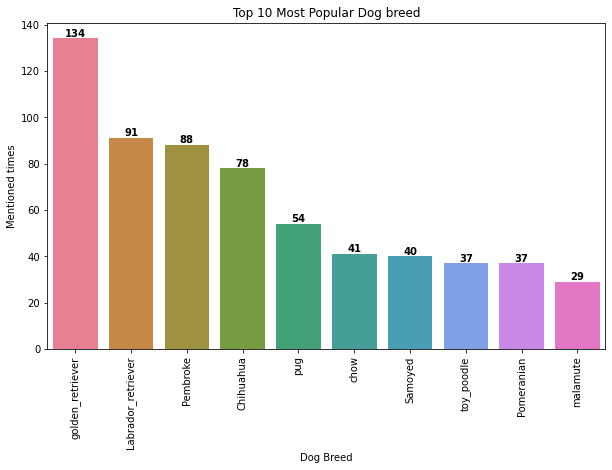

In [67]:
popular_dog = df['p1'].value_counts().head(10)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn
sns.barplot(x=popular_dog.index, y=popular_dog.values, palette = 'husl')

# Add value labels on top of each column
for i, v in enumerate(popular_dog.values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight='bold')
    
# Set labels and title
plt.xlabel('Dog Breed')
plt.ylabel('Mentioned times')
plt.title('Top 10 Most Popular Dog breed')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Save the figure as a PNG file
if not os.path.exists('Result_1'):
    # Save the figure as a PNG file
    plt.savefig('Result_1', dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

#### Rating of the most popular dog

In [68]:
# create a rating column ( on the scale of 10)
df['rating']= df['rating_numerator']/df['rating_denominator'] * 10

In [69]:
# filter df to query the value for the most popular dog
filtered_df = df[df['p1'].isin(popular_dog.index)]

# Calculate the average rating for the top 10 popular dog
average_rating = filtered_df.groupby('p1')['rating'].mean().nlargest(10)
average_rating.head(10)

p1
Samoyed               11.700000
chow                  11.609756
golden_retriever      11.567164
Pembroke              11.443182
Pomeranian            11.189189
Labrador_retriever    11.131868
toy_poodle            11.054054
malamute              10.896552
Chihuahua             10.692308
pug                   10.240741
Name: rating, dtype: float64

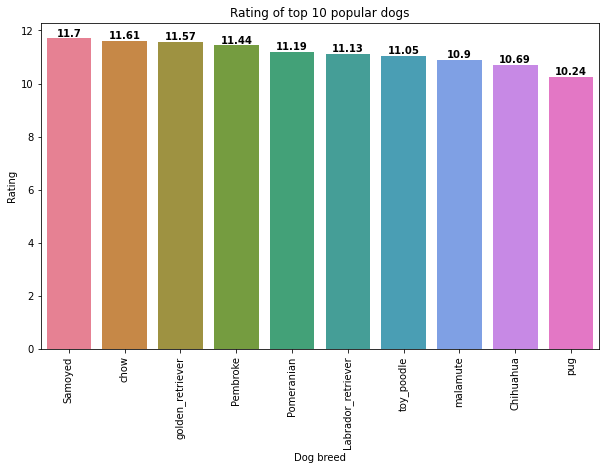

In [70]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn
sns.barplot(x=average_rating.index, y=average_rating.values, palette='husl')

# Add value labels on top of each column
for i, v in enumerate(average_rating.values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight='bold')

# Set labels and title
plt.xlabel('Dog breed')
plt.ylabel('Rating')
plt.title('Rating of top 10 popular dogs')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Save the figure as a PNG file
if not os.path.exists('Result_2'):
    # Save the figure as a PNG file
    plt.savefig('Result_2', dpi=300, bbox_inches='tight')

# Display the chart
plt.show()


#### Posting trend overtime (Monthly period)

In [71]:
# Convert the 'timestamp' column to a datetime data type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the 'timestamp' column as the DataFrame index
df.set_index('timestamp', inplace=True)


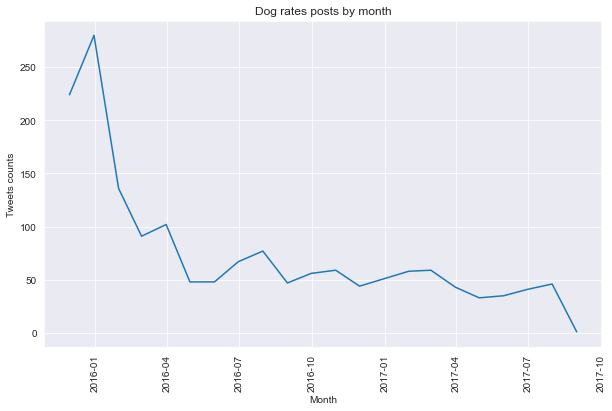

In [72]:
# Resample the data on a monthly basis and calculate the count of tweets
monthly_counts = df['tweet_id'].resample('M').count()

# Set the Seaborn style
sns.set_style('darkgrid')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a line plot using Seaborn
sns.lineplot(data=monthly_counts)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Tweets counts')
plt.title('Dog rates posts by month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Save the figure as a PNG file
if not os.path.exists('Result_3'):
    # Save the figure as a PNG file
    plt.savefig('Result_3', dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

> We can clearly see a downtrend overtime here

#### Posts's sources

In [73]:
df['source'].value_counts()/df['source'].shape[0]

Twitter for iPhone    0.981166
Twitter Web Client    0.013366
TweetDeck             0.005468
Name: source, dtype: float64

### Insights:
1. Golden retriever is the most mentioned dog with more than 134 times, in the second place is Labrador retriever , and Pembroke in the third place.

2. Among the most popular dog breed, Samoyed has the highest average rating at 11.7/10

3. The number of dog rates posts spike up in early 2016 as the trend start but then start to decline over time  

4. 93% of the posts are from twitter apps, 5% from Vine and 1% from Twitter web clients, barely any of them are posted by TweetDeck